# Построение регрессий

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import math

In [2]:
from sklearn.linear_model import LinearRegression

## 1 Протестируем построение регрессии на хорошей картинке

In [225]:
def plot_needle(df_list_to_scatter: list = None , df_list_to_plot: list = None, picture_path: str = None):
    linewidth = 1
    if picture_path is None:
        plt.figure(figsize=(15,8))
    else:
        plt.figure(figsize=(13, 13))
        img = cv.imread(picture_path, 1)
        plt.imshow(img)
        linewidth = 5
    if df_list_to_scatter is not None:
        for df in df_list_to_scatter:
            plt.scatter(df["x"], df["y"], alpha=0.6)
    if df_list_to_plot is not None:
        for df in df_list_to_plot:
            plt.plot(df["x"], df["y"], linewidth = linewidth)
    plt.show()

In [212]:
def get_regression(df):
    model = LinearRegression(normalize = True)
    # model = LinearRegression()
    model.fit(df["x"].to_numpy().reshape(-1, 1), df["y"].to_numpy().reshape(-1, 1))
    return model

In [8]:
needle_good = pd.read_csv("../dataset/zoom_needle_no_background_table/b_needle_3.csv")[["x", "y"]]

In [31]:
needle_good

x   y
0      0  59
1      1  60
2      2  61
3      3  61
4      4  61
..   ...  ..
275  275  61
276  276  60
277  277  60
278  278  59
279  279  58

[280 rows x 2 columns]

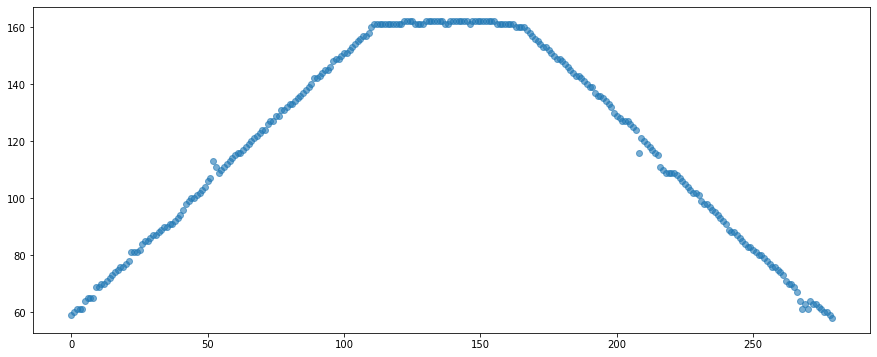

In [67]:
plot_needle(df_list_to_scatter = [needle_good])

Найдём точку максимума

In [41]:
needle_good_max = needle_good.loc[[needle_good["y"].idxmax()]].to_numpy()[0]
needle_good_max

array([122, 162], dtype=int64)

Разобъём иглу на 2 боковых грани

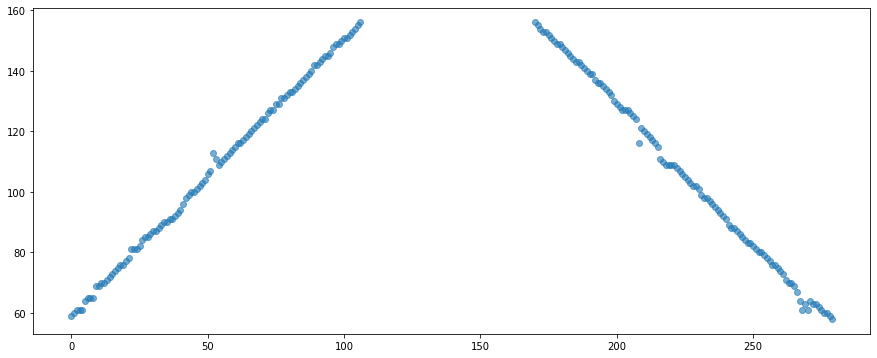

In [68]:
needle_good_edges = needle_good[needle_good["y"] < needle_good_max[1] - 0.05*(needle_good_max[1] - needle_good["y"].min())]
plot_needle(df_list_to_scatter = [needle_good_edges])

Разделем боковые грани на 2

In [58]:
needle_good_edge_1 = needle_good_edges[needle_good_edges["x"] < needle_good_max[0]]
needle_good_edge_2 = needle_good_edges[needle_good_edges["x"] > needle_good_max[0]]

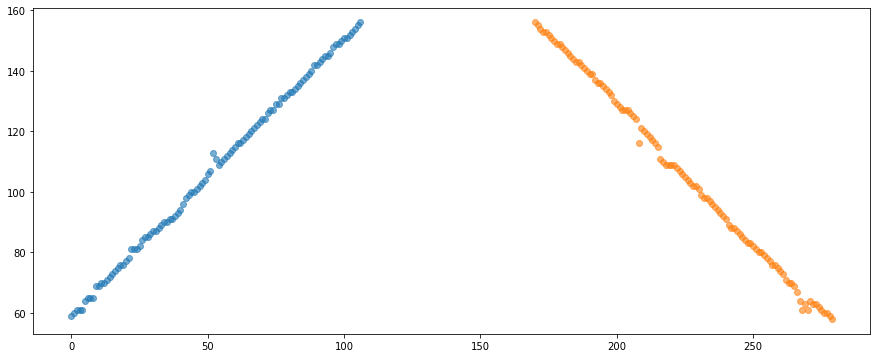

In [69]:
plot_needle(df_list_to_scatter = [needle_good_edge_1, needle_good_edge_2])

Построим регрессии для боковых граней:

In [116]:
needle_good_edge_1_regression = get_regression(needle_good_edge_1)
needle_good_edge_2_regression = get_regression(needle_good_edge_2)

In [138]:
needle_good_edge_1_line = pd.DataFrame([x for x in range(needle_good_edges["x"][0], needle_good_max[0] + 50)], columns=["x"])
needle_good_edge_1_line["y"] = needle_good_edge_1_regression.predict(needle_good_edge_1_line["x"].to_numpy().reshape(-1, 1))
needle_good_edge_2_line = pd.DataFrame([x for x in range(needle_good_max[0] - 50, needle_good_edges["x"][needle_good.shape[0] - 1])], columns=["x"])
needle_good_edge_2_line["y"] = needle_good_edge_2_regression.predict(needle_good_edge_2_line["x"].to_numpy().reshape(-1, 1))

Построим горизонтальную линию для "тупой" грани

In [144]:
needle_good_edge_3_line = pd.DataFrame([x for x in range(needle_good["x"][0], needle_good["x"][needle_good.shape[0] - 1])], columns=["x"])
needle_good_edge_3_line["y"] = [needle_good_max[1]] * needle_good_edge_3_line.shape[0]

Выведем изображения

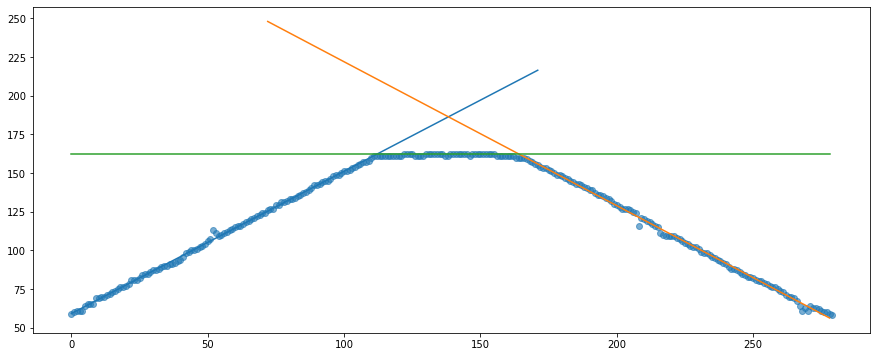

In [145]:
plot_needle(df_list_to_scatter = [needle_good], 
            df_list_to_plot = [needle_good_edge_1_line, needle_good_edge_2_line, needle_good_edge_3_line])

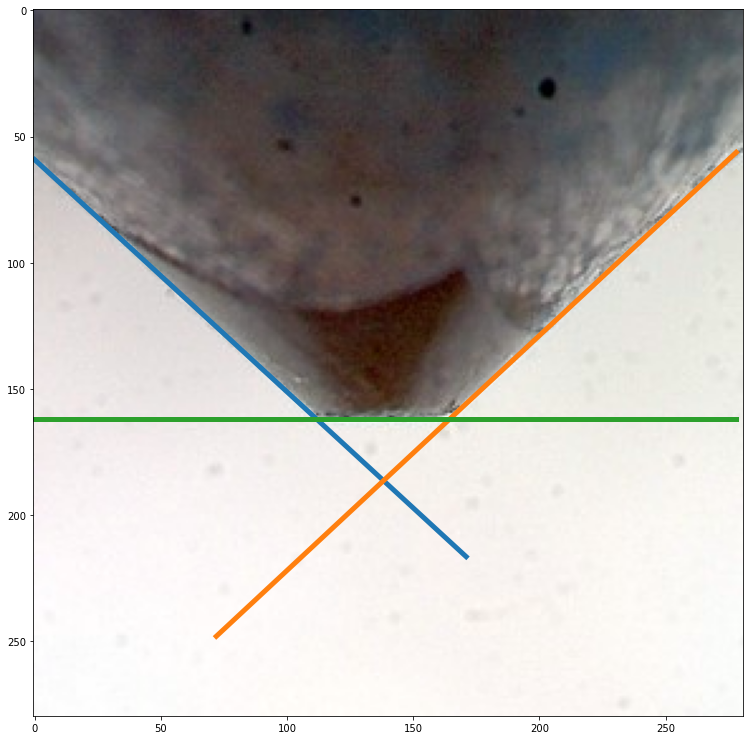

In [228]:
plot_needle(df_list_to_plot = [needle_good_edge_1_line, needle_good_edge_2_line, needle_good_edge_3_line],
           picture_path = "../dataset/zoom_needle_no_background/b_needle_3.jpg")

Как видно, на хорошем изображении всё очень хорошо получается

## 2 Протестируем построение регрессии на плохой картинке

In [180]:
needle_bad = pd.read_csv("../dataset/zoom_needle_no_background_table/s_needle_5.csv")[["x", "y"]]
needle_bad

x    y
0      3  282
1      4  282
2      5  282
3      6  282
4      7  282
..   ...  ...
624  739  245
625  740  244
626  741  243
627  742  241
628  743  240

[629 rows x 2 columns]

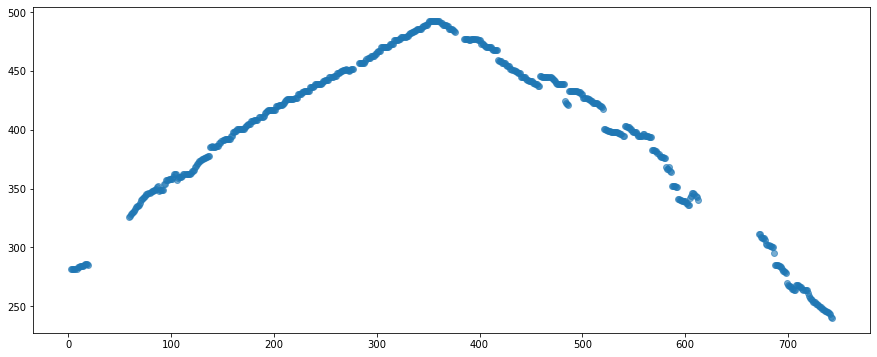

In [181]:
plot_needle(df_list_to_scatter = [needle_bad])

In [182]:
needle_bad = needle_bad[needle_bad["y"] > needle_bad["y"].max() - ((needle_bad["y"].max() - needle_bad["y"].min()) / 3)]

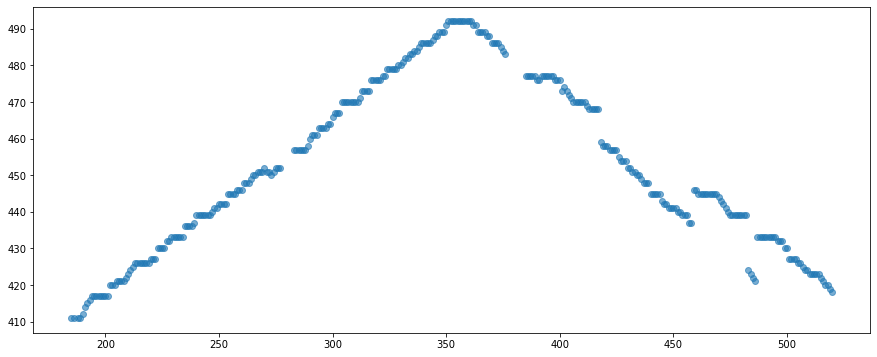

In [183]:
plot_needle(df_list_to_scatter = [needle_bad])

Найдём точку максимума

In [184]:
needle_bad_max = needle_bad.loc[[needle_bad["y"].idxmax()]].to_numpy()[0]
needle_bad_max

array([351, 492], dtype=int64)

Разобъём иглу на 2 боковых грани

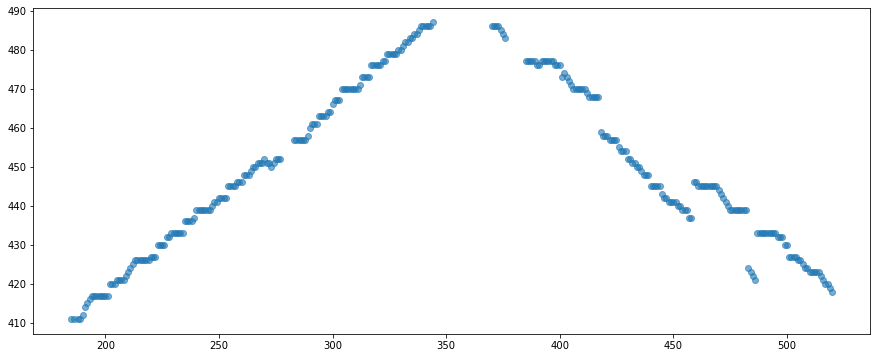

In [185]:
needle_bad_edges = needle_bad[needle_bad["y"] < needle_bad_max[1] - 0.05*(needle_bad_max[1] - needle_bad["y"].min())]
plot_needle(df_list_to_scatter = [needle_bad_edges])

Разделем боковые грани на 2

In [186]:
needle_bad_edge_1 = needle_bad_edges[needle_bad_edges["x"] < needle_bad_max[0]]
needle_bad_edge_2 = needle_bad_edges[needle_bad_edges["x"] > needle_bad_max[0]]

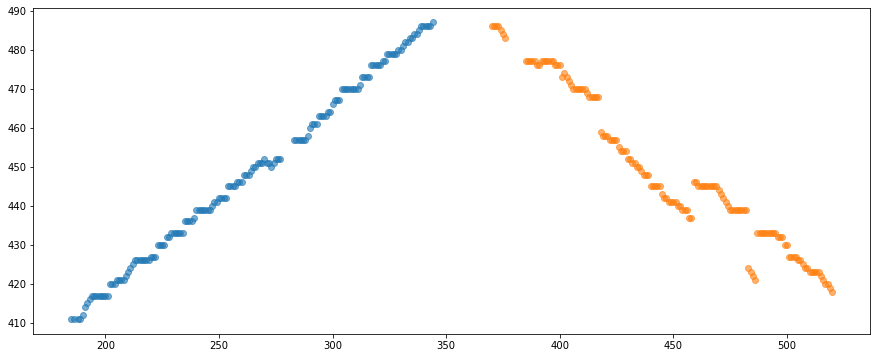

In [187]:
plot_needle(df_list_to_scatter = [needle_bad_edge_1, needle_bad_edge_2])

Построим регрессии для боковых граней:

In [188]:
needle_bad_edge_1_regression = get_regression(needle_bad_edge_1)
needle_bad_edge_2_regression = get_regression(needle_bad_edge_2)

In [189]:
needle_bad_edge_1_line = pd.DataFrame([x for x in range(needle_bad_edges["x"].iloc[0], needle_bad_max[0] + 50)], columns=["x"])
needle_bad_edge_1_line["y"] = needle_bad_edge_1_regression.predict(needle_bad_edge_1_line["x"].to_numpy().reshape(-1, 1))
needle_bad_edge_2_line = pd.DataFrame([x for x in range(needle_bad_max[0] - 50, needle_bad_edges["x"].iloc[needle_bad_edges.shape[0] - 1])], columns=["x"])
needle_bad_edge_2_line["y"] = needle_bad_edge_2_regression.predict(needle_bad_edge_2_line["x"].to_numpy().reshape(-1, 1))

Построим горизонтальную линию для "тупой" грани

In [190]:
needle_bad_edge_3_line = pd.DataFrame([x for x in range(needle_bad["x"].iloc[0], needle_bad["x"].iloc[needle_bad_edges.shape[0] - 1])], columns=["x"])
needle_bad_edge_3_line["y"] = [needle_bad_max[1]] * needle_bad_edge_3_line.shape[0]

Выведем изображения

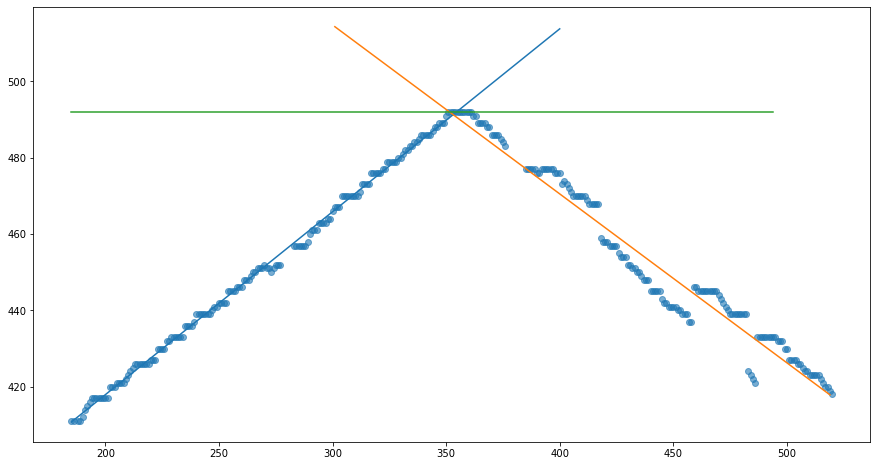

In [213]:
plot_needle(df_list_to_scatter = [needle_bad], 
            df_list_to_plot = [needle_bad_edge_1_line, needle_bad_edge_2_line, needle_bad_edge_3_line])

Как видно, на плохом изображении всё плохо получается

Попробуем посортировать точки

In [236]:
class LinearInterpolate:
    def __init__(self, df):
        self.model = LinearRegression(normalize = True, n_jobs=-1)
        self.fit(df["x"].to_numpy(), df["y"].to_numpy())
        
    def fit(self, x_list: list, y_list: list):
        # Откинем лишние точки по мере их удалённости от наконечкика
        l = len(x_list)
        y_list_new = []
        x_list_new = []
        if y_list[0] < y_list[-1]: # если левая граница
            y_list_new = np.hstack([y_list[:round(l*0.3):6], y_list[round(l*0.3):round(l*0.6):3], y_list[round(l*0.6)::1]])
            x_list_new = np.hstack([x_list[:round(l*0.3):6], x_list[round(l*0.3):round(l*0.6):3], x_list[round(l*0.6)::1]])
        else:                      # если правая граница
            y_list_new = np.hstack([y_list[:round(l*0.4):1], y_list[round(l*0.7):round(l*0.6):3], y_list[round(l*0.7)::6]]) 
            x_list_new = np.hstack([x_list[:round(l*0.4):1], x_list[round(l*0.7):round(l*0.6):3], x_list[round(l*0.7)::6]]) 
        # Обучаем модель
        self.model.fit(x_list_new.reshape(-1, 1), y_list_new.reshape(-1, 1))
        
    def predict(self, x_list):
         return self.model.predict(x_list.reshape(-1, 1))
        
    def get_weight(self):
        weight = self.model.coef_
        weight = np.append(weight, self.model.intercept_)
        return weight

In [238]:
needle_bad_edge_1_interpolate = LinearInterpolate(needle_bad_edge_1)
needle_bad_edge_2_interpolate = LinearInterpolate(needle_bad_edge_2)

In [272]:
needle_bad_edge_1_interpolate.get_weight()

array([  0.48361002, 320.76090077])

In [217]:
needle_bad_edge_1_line_better = pd.DataFrame([x for x in range(needle_bad_edges["x"].iloc[0], needle_bad_max[0] + 50)], columns=["x"])
needle_bad_edge_1_line_better["y"] = needle_bad_edge_1_interpolate.predict(needle_bad_edge_1_line_better["x"].to_numpy())
needle_bad_edge_2_line_better = pd.DataFrame([x for x in range(needle_bad_max[0] - 50, needle_bad_edges["x"].iloc[needle_bad_edges.shape[0] - 1])], columns=["x"])
needle_bad_edge_2_line_better["y"] = needle_bad_edge_2_interpolate.predict(needle_bad_edge_2_line_better["x"].to_numpy())

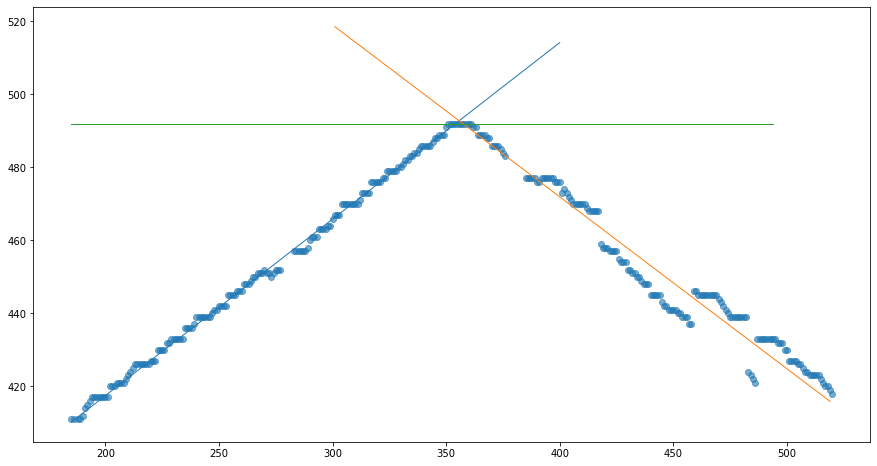

In [226]:
plot_needle(df_list_to_scatter = [needle_bad], 
            df_list_to_plot = [needle_bad_edge_1_line_better, needle_bad_edge_2_line_better, needle_bad_edge_3_line])

Получилось что то неплохое

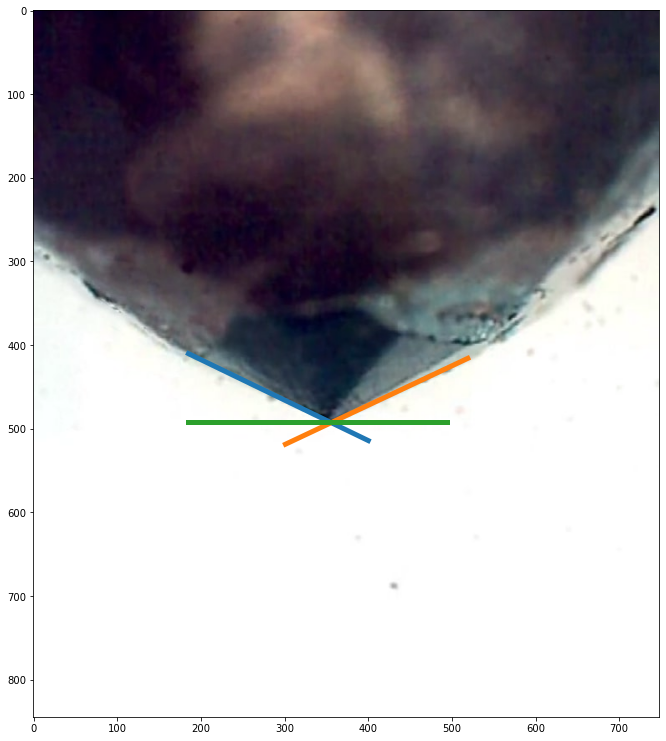

In [227]:
plot_needle(df_list_to_plot = [needle_bad_edge_1_line_better, needle_bad_edge_2_line_better, needle_bad_edge_3_line], 
            picture_path = "../dataset/zoom_needle_no_background/s_needle_5.jpg")

## 3 Посмотрим, как работает на всех картинках

In [65]:
def plot_needle_final(df_list_to_scatter: list = None , 
                      df_list_to_plot: list = None, 
                      picture: np.ndarray = None, 
                      df_list_single_line: list = None, 
                      ):
    linewidth = 1
    if picture is None:
        plt.figure(figsize=(15,8))
    else:
        plt.figure(figsize=(30, 13))
        plt.subplot(131)
        plt.imshow(picture)
        plt.title('Игла для сравнения')
        plt.subplot(132)
        plt.imshow(picture)
        linewidth = 3
        
    if df_list_to_scatter is not None:
        for df in df_list_to_scatter:
            plt.scatter(df["x"], df["y"], alpha=0.4, color="Yellow")
    color = ["Blue", "Blue", "Green"]
    if df_list_to_plot is not None:
        for df in df_list_to_plot:
            plt.plot(df["x"], df["y"], linewidth = linewidth, alpha=0.8, color=color[0], linestyle = "dashed")
            color.pop(0)
    plt.title('Игла с построенными линиями')
    
    if df_list_single_line is not None:
        for df in df_list_single_line:
            plt.subplot(133)
            plt.plot(df["x"], df["y"], alpha=1)
            plt.title('Построенные линии отдельно')
    
    plt.show()

In [68]:
class LinearInterpolate:
    def __init__(self, df):
        self.model = LinearRegression(normalize = True, n_jobs=-1)
        self.fit(df["x"].to_numpy(), df["y"].to_numpy())
        
    def fit(self, x_list: list, y_list: list, loss_zone: float = 0.6, loss_ratio: int = 4):
        # Откинем лишние точки по мере их удалённости от наконечкика
        l = len(x_list)
        y_list_new = []
        x_list_new = []
        if y_list[0] < y_list[-1]: # если левая граница
            y_list_new = np.hstack([y_list[:round(l*(loss_zone/2)):loss_ratio], y_list[round(l*(loss_zone/2)):round(l*loss_zone):math.ceil(loss_ratio/2)], y_list[round(l*loss_zone)::1]])
            x_list_new = np.hstack([x_list[:round(l*(loss_zone/2)):loss_ratio], x_list[round(l*(loss_zone/2)):round(l*loss_zone):math.ceil(loss_ratio/2)], x_list[round(l*loss_zone)::1]])
        else:                      # если правая граница
            y_list_new = np.hstack([y_list[:round(l*(1-loss_zone)):1], y_list[round(l*(1-loss_zone)):round(l*(1-loss_zone/2)):math.ceil(loss_ratio/2)], y_list[round(l*(1-loss_zone/2))::loss_ratio]]) 
            x_list_new = np.hstack([x_list[:round(l*(1-loss_zone)):1], x_list[round(l*(1-loss_zone)):round(l*(1-loss_zone/2)):math.ceil(loss_ratio/2)], x_list[round(l*(1-loss_zone/2))::loss_ratio]]) 
        # Обучаем модель
        self.model.fit(x_list_new.reshape(-1, 1), y_list_new.reshape(-1, 1))
        
    def predict(self, x_list):
         return self.model.predict(x_list.reshape(-1, 1))
        
    def get_weight(self):
        weight = self.model.coef_
        weight = np.append(weight, self.model.intercept_)
        return weight

In [24]:
class Line:
    def __init__(self, a: float, b: float):
        self.a = a
        self.b = b
        
    def value(self, x: float) -> float:
        return self.a * x + self.b

In [53]:
class Liner:
    def __init__(self, a1: float, b1: float, a2: float, b2: float, y_max: float):
        self.left_line = self.__line(a1, b1)
        self.right_line = self.__line(a2, b2)
        self.horizontal_line = self.__line(0, y_max)        
        
    def __line(self, a: float, b: float) -> Line:
        line = Line(a, b)
        return line
    
    def __cross_point_lines(self, line1: Line, line2: Line) -> tuple:
        numerator = line2.b - line1.b
        denumerator = line1.a - line2.a

        x = numerator / denumerator
        y = line1.value(x)
        return (x, y)
    
    def sharpening_angle(self) -> float:
        numerator = self.left_line.a - self.right_line.a
        denumerator = 1 + self.left_line.a * self.right_line.a
        if denumerator == 0:
            return 90.0
        alpha = math.degrees(math.atan(numerator / denumerator))
        return round(180 - alpha, 2)
    
    def area_triangle(self) -> float:
        # Точки пересечения прямых
        left_cross_point = np.array(self.__cross_point_lines(self.left_line, self.horizontal_line))
        middle_cross_point = np.array(self.__cross_point_lines(self.left_line, self.right_line))
        right_cross_point = np.array(self.__cross_point_lines(self.right_line, self.horizontal_line))
        # S = 1/2 ab * sin(apha)
        a = np.linalg.norm(left_cross_point - middle_cross_point)
        b = np.linalg.norm(right_cross_point - middle_cross_point)
        alpha = self.sharpening_angle()
        S = 0.5 * a * b * math.sin(math.radians(alpha))
        return S

In [9]:
def build_linear(df):
    needle = df.copy()
    # Обрезаем нижние границы
    needle = needle[needle["y"] > needle["y"].max() - ((needle["y"].max() - needle["y"].min()) / 3)]
    # найдём точку максимума
    needle_max = needle.loc[[needle["y"].idxmax()]].to_numpy()[0]
    # разобъём на 2 боковых грани
    needle_edges = needle[needle["y"] < needle_max[1] - 0.1*(needle_max[1] - needle["y"].min())]
    # разобъём на боковые грани
    needle_edge_1 = needle_edges[needle_edges["x"] < needle_max[0]]
    needle_edge_2 = needle_edges[needle_edges["x"] > needle_max[0]]
    # построим регрессии для боковых граней
    needle_edge_1_interpolate = LinearInterpolate(needle_edge_1)
    needle_edge_2_interpolate = LinearInterpolate(needle_edge_2)
    # вычленим из них параметры
    (a1, b1) = needle_edge_1_interpolate.get_weight()
    (a2, b2) = needle_edge_2_interpolate.get_weight()
    # возвращаем функции линий:
    return Liner(a1, b1, a2, b2, needle_max[1])

In [62]:
type(pd.DataFrame())

pandas.core.frame.DataFrame

In [10]:
needle_contours_path = pd.read_csv("../dataset/zoom_needle_no_background_table.csv", sep=";")[["path"]]
needle_imgs_path = pd.read_csv("../dataset/zoom_needle_no_background.csv", sep=";")[["path"]]

In [11]:
needle_contours_path["path"][0]

'zoom_needle_no_background_table/b_needle_1.csv'

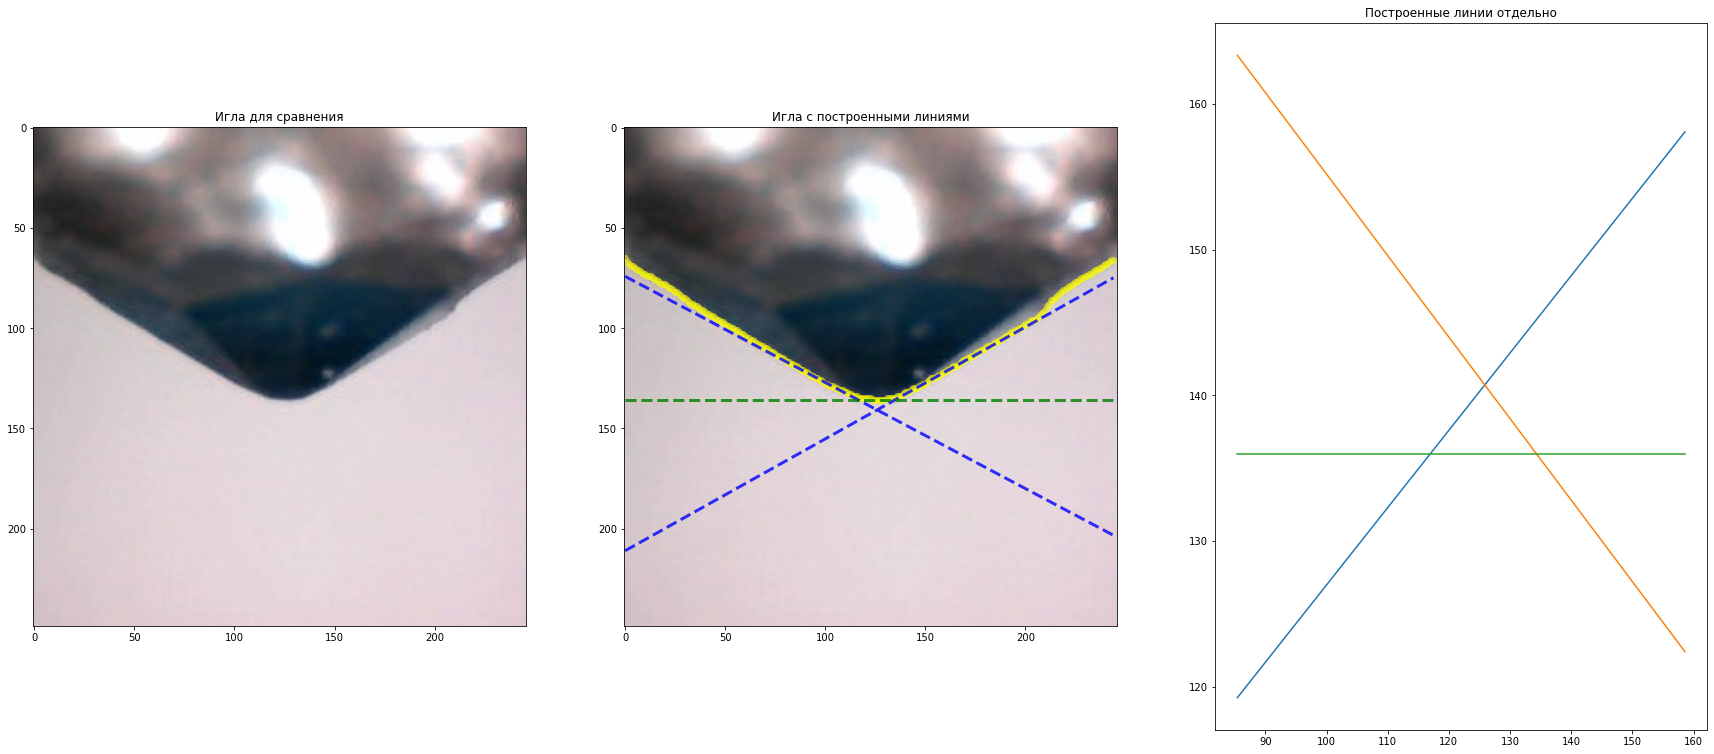

Угол заточки: 122.86
Площадь тупости в px^2: 40.964632315517626


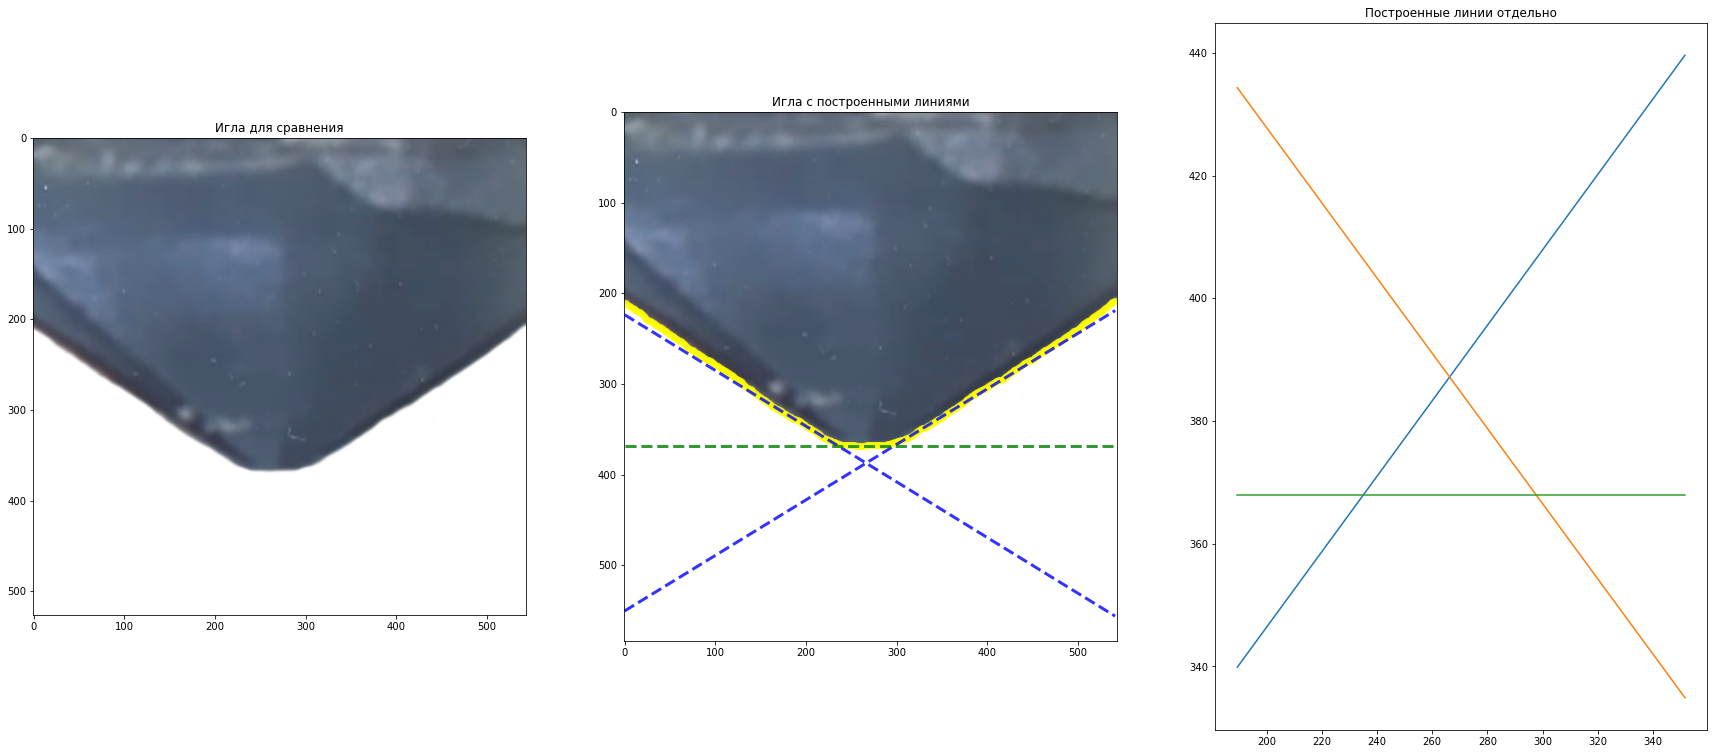

Угол заточки: 116.95
Площадь тупости в px^2: 599.2584333967501


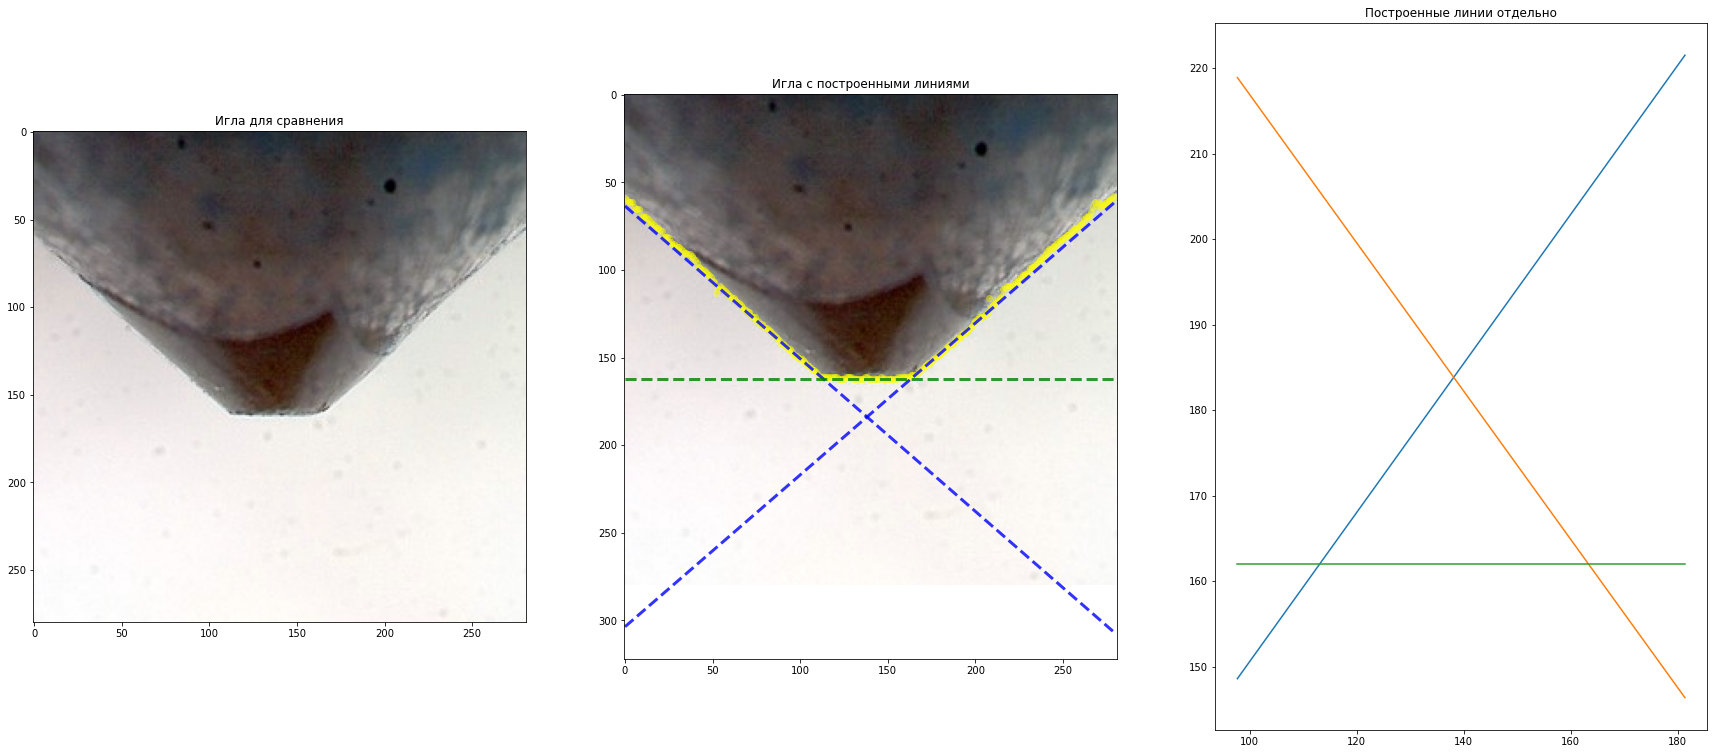

Угол заточки: 98.01
Площадь тупости в px^2: 549.3484117506813


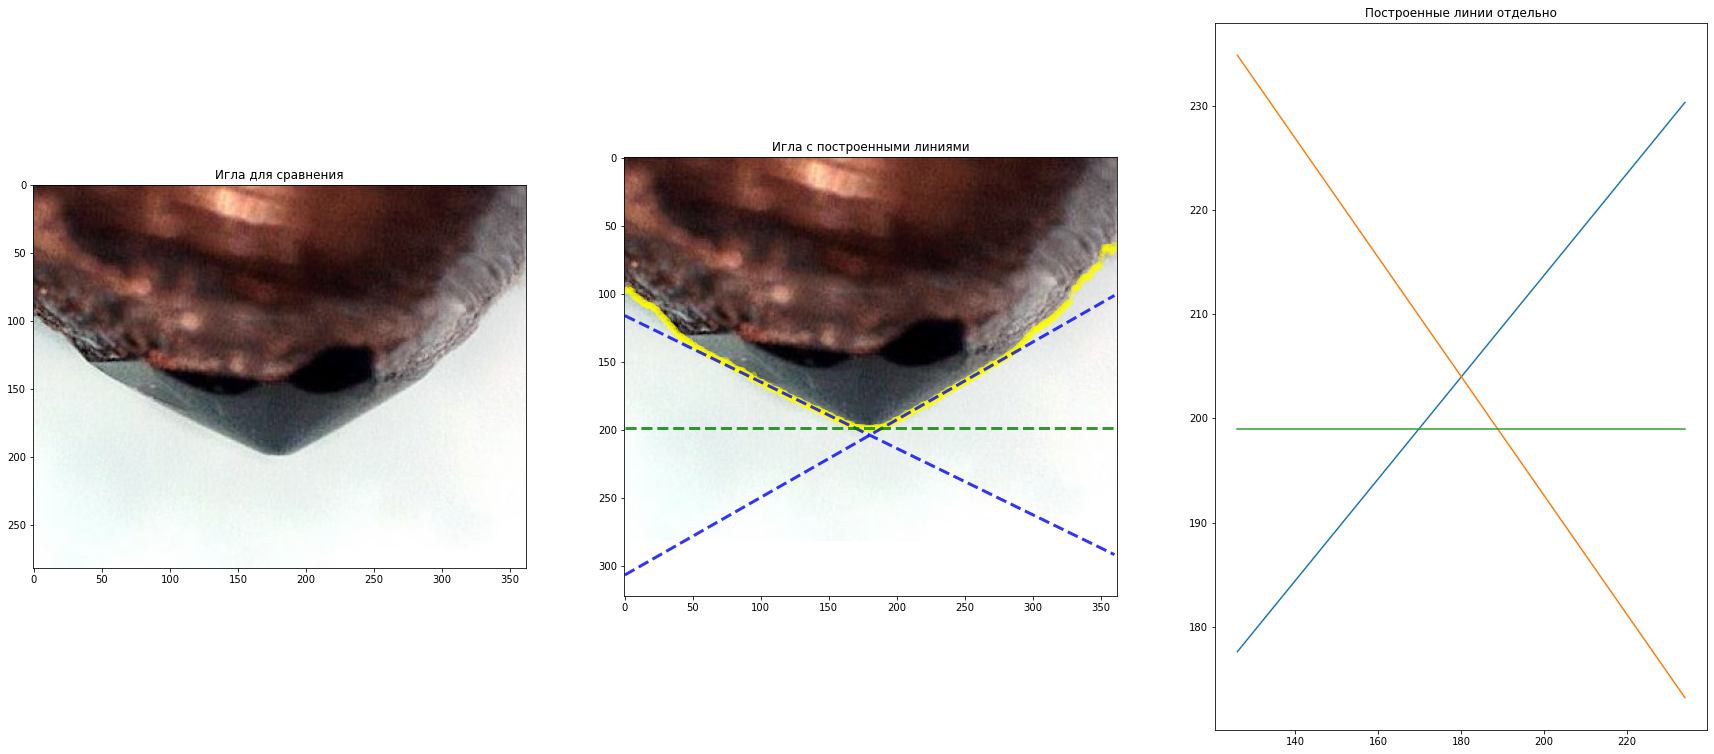

Угол заточки: 124.26
Площадь тупости в px^2: 47.24135274246345


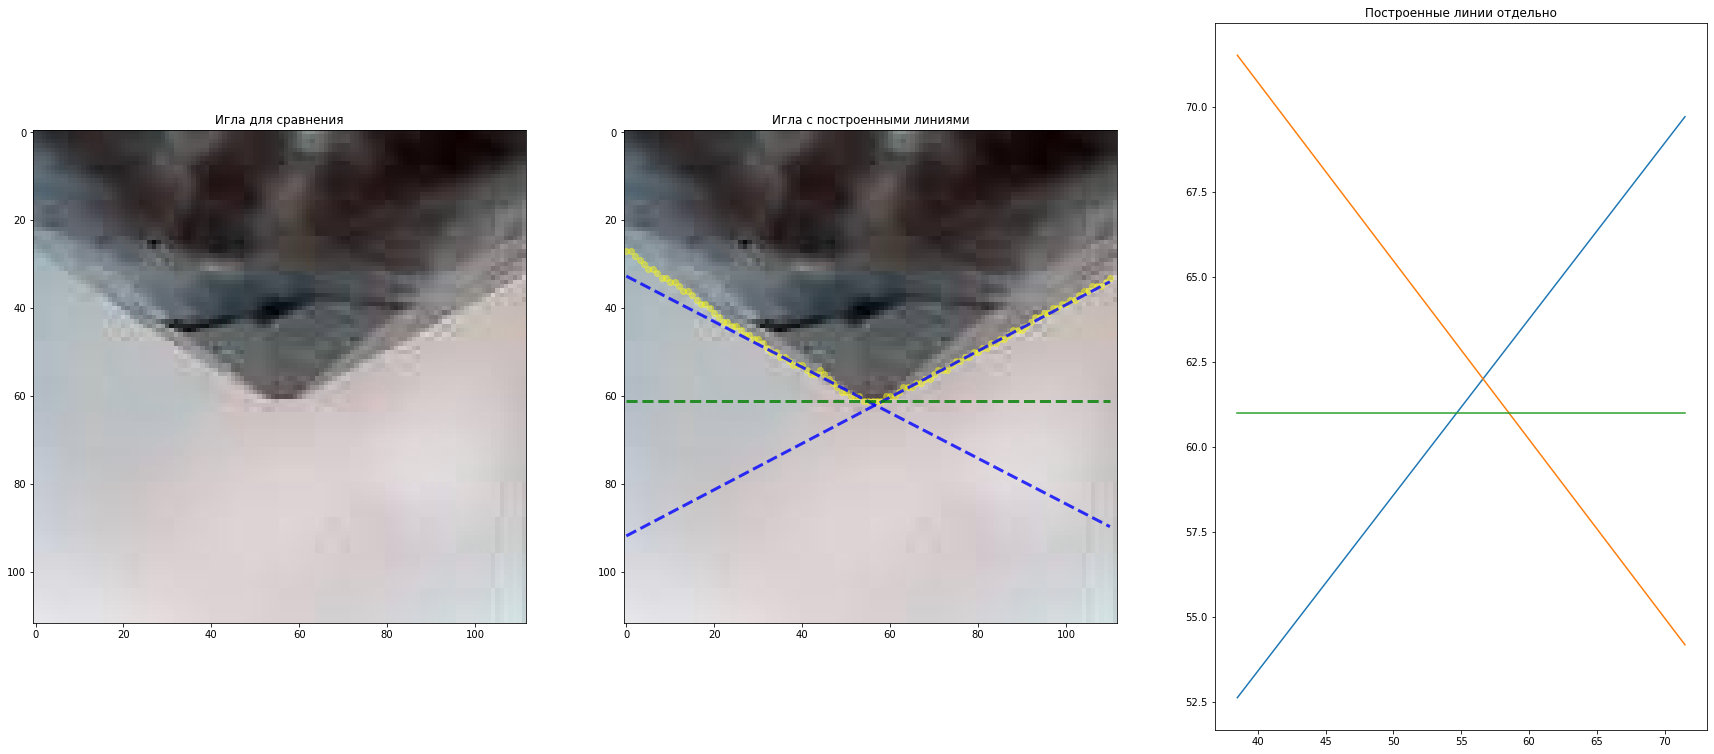

Угол заточки: 124.88
Площадь тупости в px^2: 1.9428054148393374


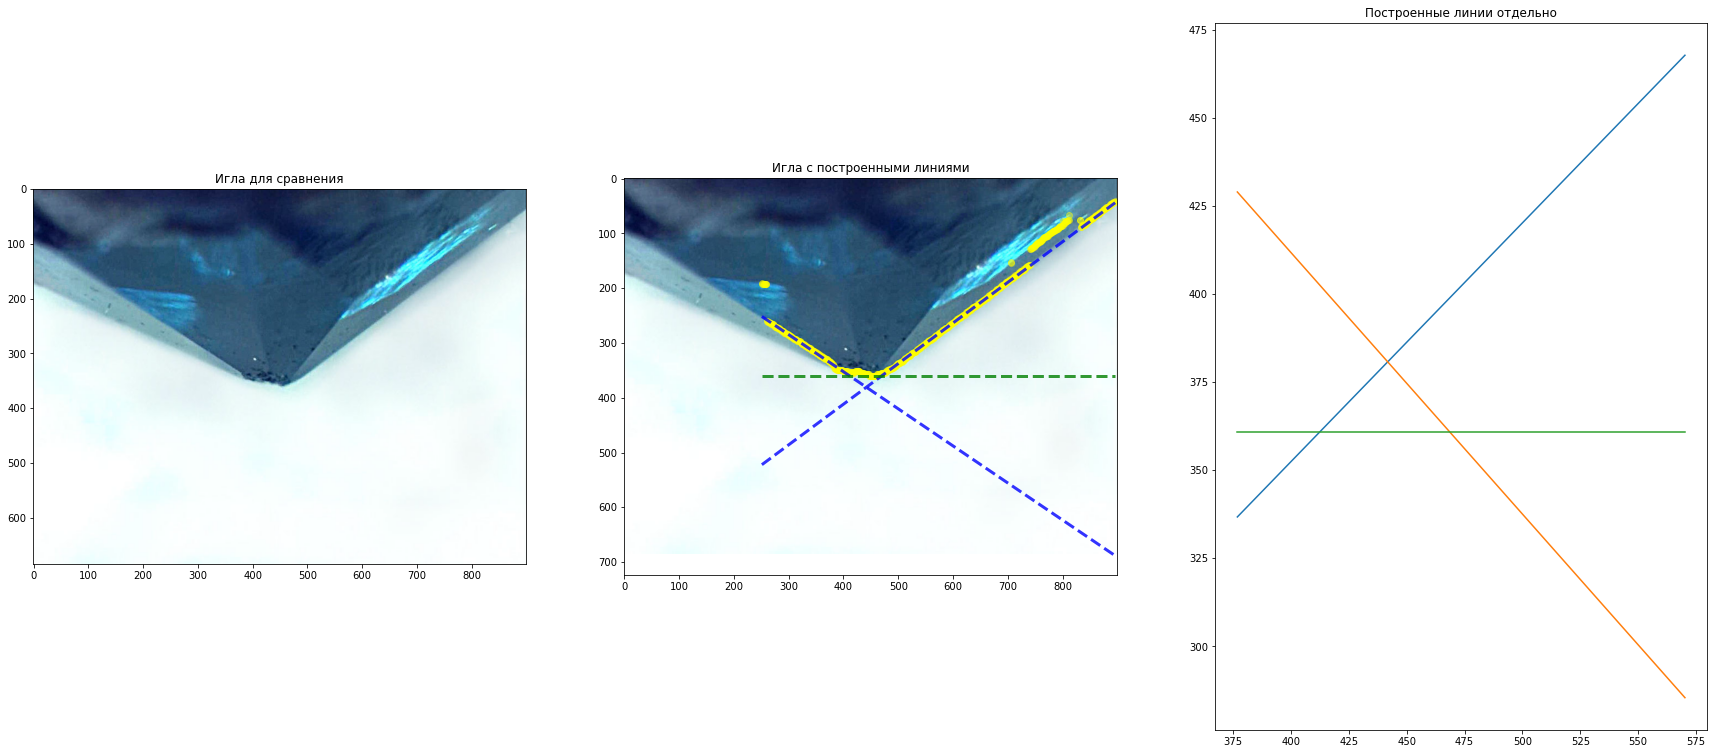

Угол заточки: 109.34
Площадь тупости в px^2: 551.911489847727


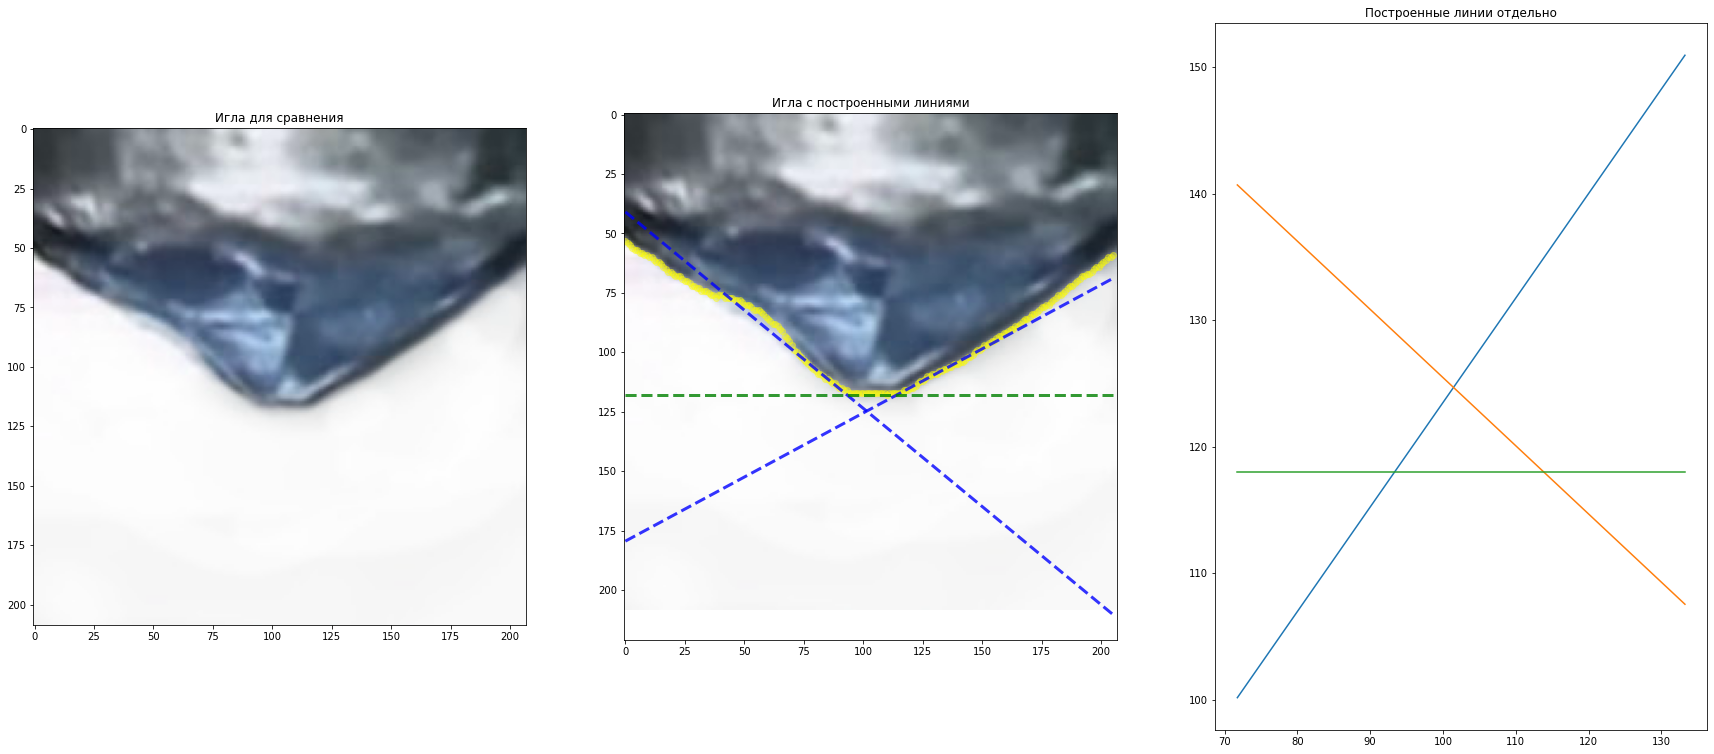

Угол заточки: 112.13
Площадь тупости в px^2: 68.5672190330793


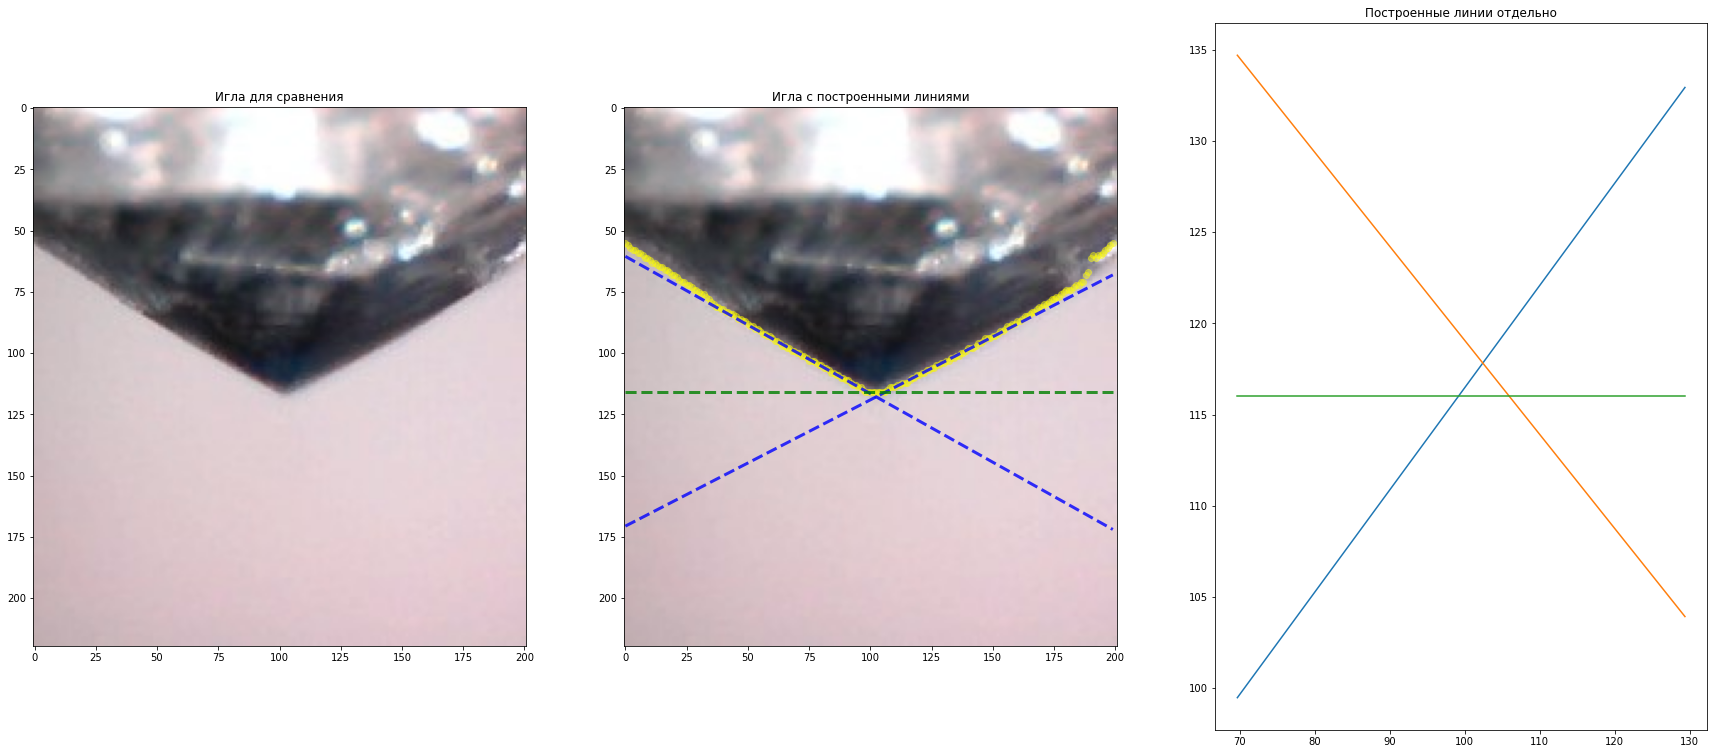

Угол заточки: 123.47
Площадь тупости в px^2: 6.227561159848826


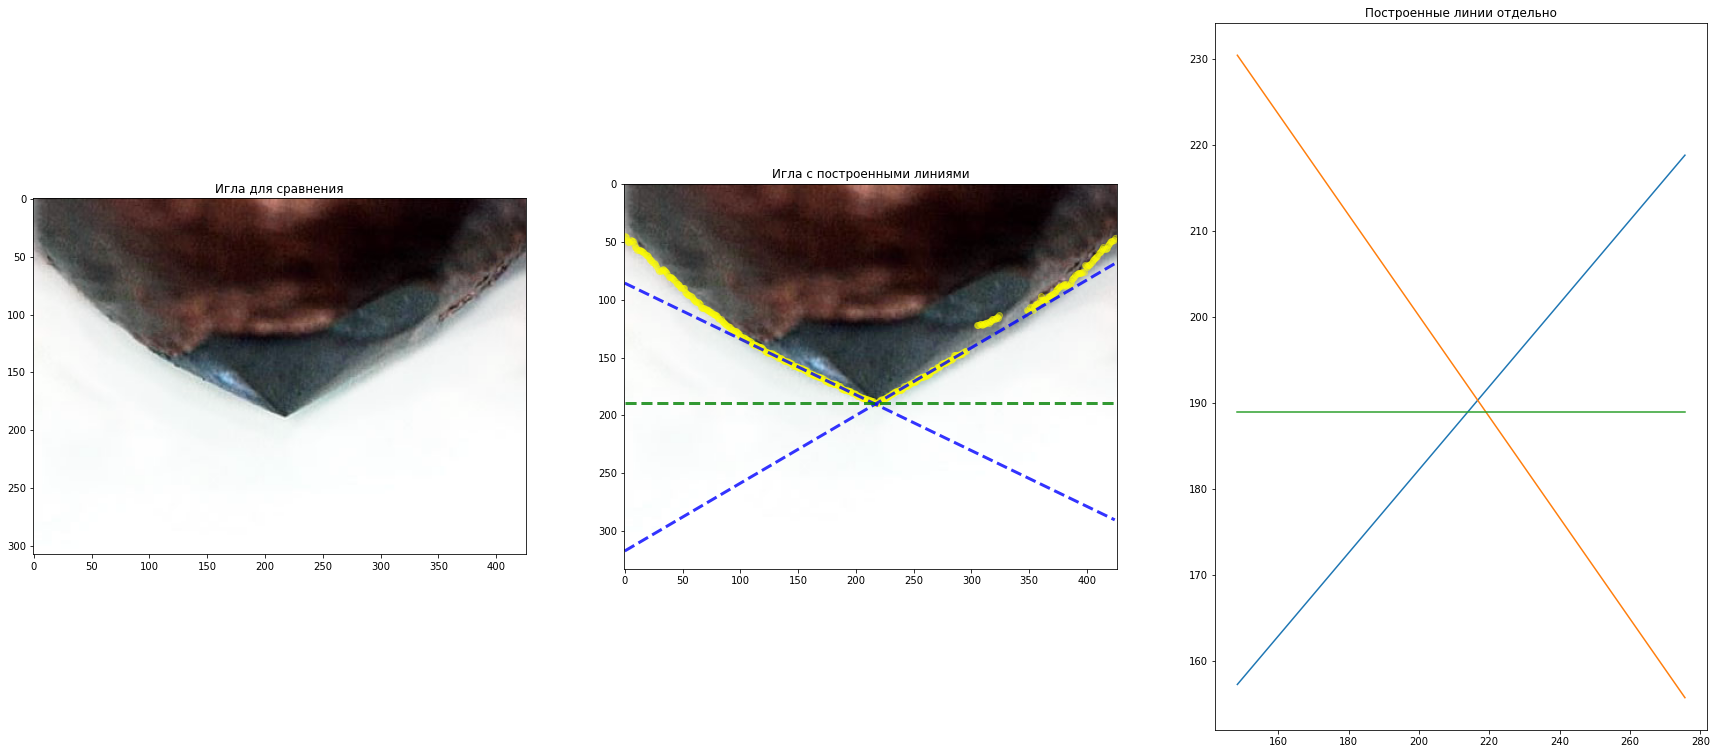

Угол заточки: 123.83
Площадь тупости в px^2: 3.313839395314293


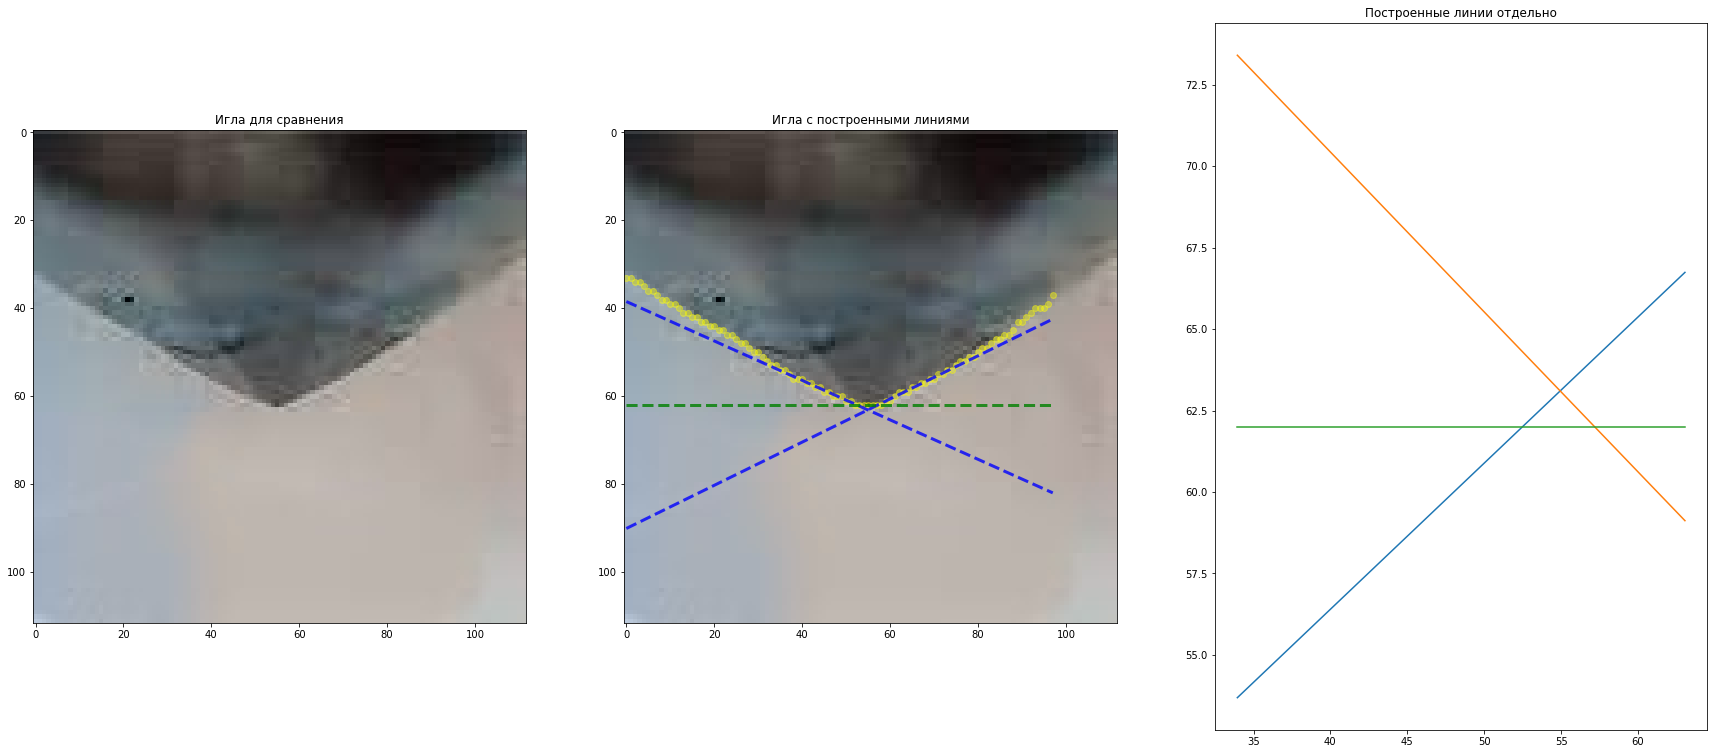

Угол заточки: 129.68
Площадь тупости в px^2: 2.6010869037438153


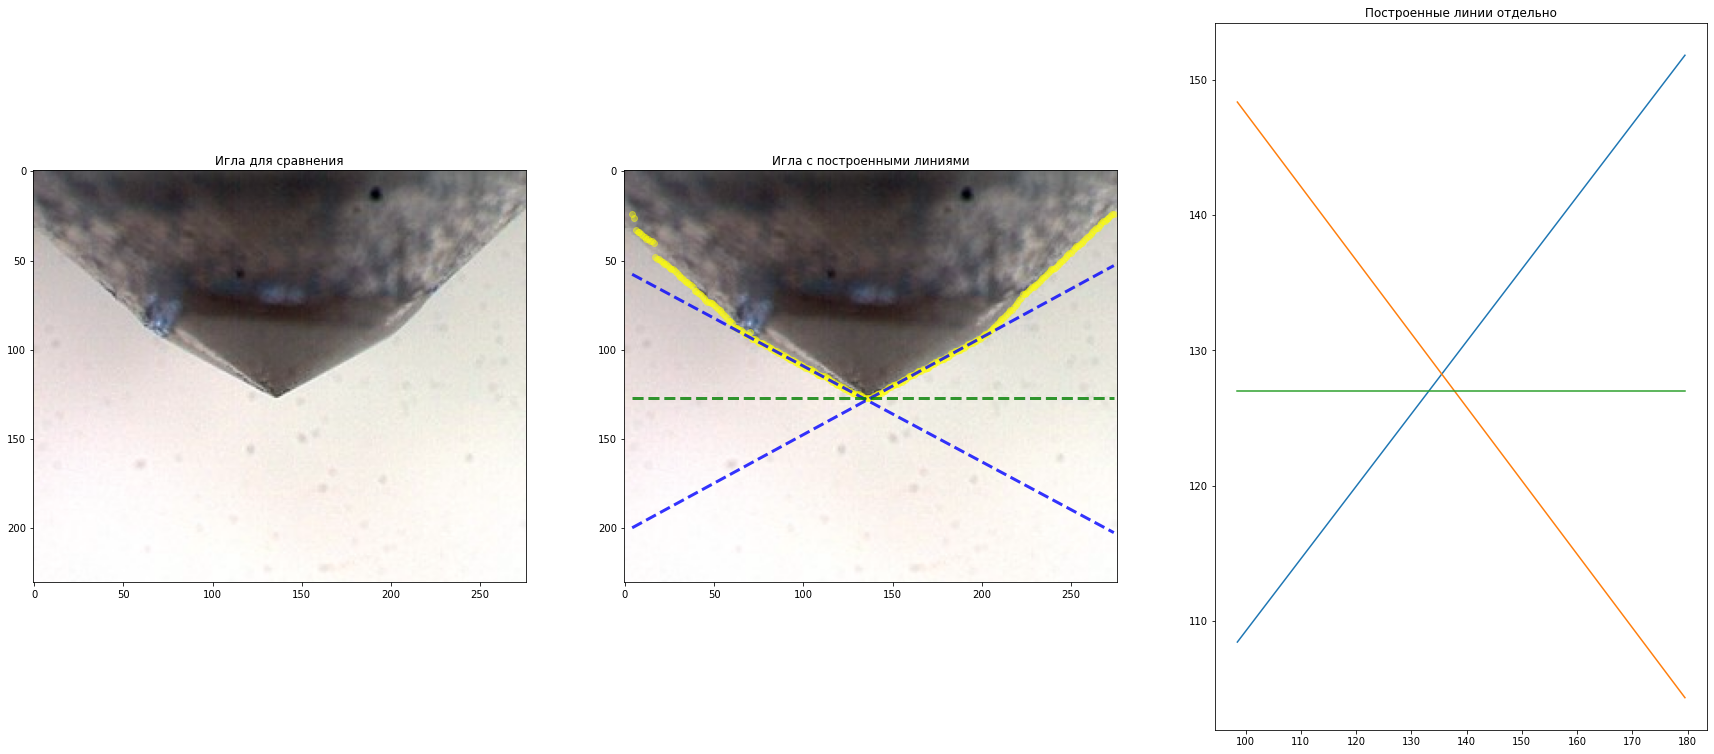

Угол заточки: 123.23
Площадь тупости в px^2: 2.8929534581519203


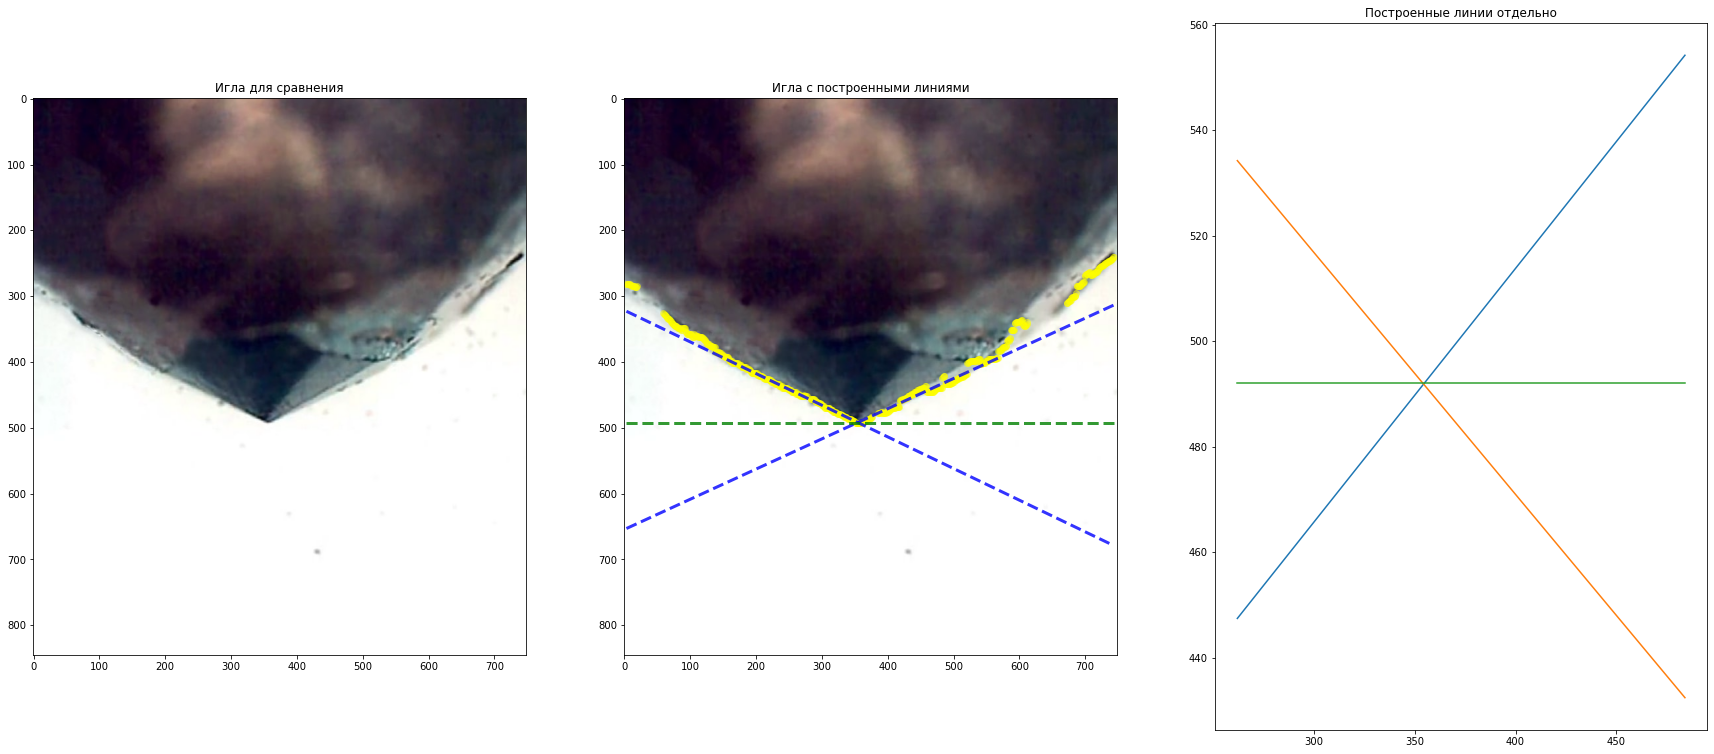

Угол заточки: 129.69
Площадь тупости в px^2: 0.03303254766730257


In [69]:
for i in range(needle_contours_path.shape[0]):
    contour = pd.read_csv("../dataset/" + needle_contours_path["path"][i])[["x", "y"]]
    linear = build_linear(contour)
    left = contour["x"][0]
    right = contour["x"][contour.shape[0] - 1 ]
    left_line = pd.DataFrame([left, right], columns=["x"])
    left_line["y"] = linear.left_line.value(left_line["x"].to_numpy())
    right_line = pd.DataFrame([left, right], columns=["x"])
    right_line["y"] = linear.right_line.value(right_line["x"].to_numpy())
    top_line = pd.DataFrame([left, right], columns=["x"])
    top_line["y"] = linear.horizontal_line.value(top_line["x"].to_numpy())
    
    middle = (left + right) / 2
    if i == 5:
        middle -= 100
    small_left = middle - 0.15*(right - left)
    small_right = middle + 0.15*(right - left)
    left_line_single = pd.DataFrame([small_left, small_right], columns=["x"])
    left_line_single["y"] = linear.left_line.value(left_line_single["x"].to_numpy())
    right_line_single = pd.DataFrame([small_left, small_right], columns=["x"])
    right_line_single["y"] = linear.right_line.value(right_line_single["x"].to_numpy())
    top_line_single = pd.DataFrame([small_left, small_right], columns=["x"])
    top_line_single["y"] = linear.horizontal_line.value(top_line_single["x"].to_numpy())
    
    img = cv.imread("../dataset/" + needle_imgs_path["path"][i], 1)
    plot_needle_final(df_list_to_scatter = [contour],
                df_list_to_plot = [left_line, right_line, top_line],
                df_list_single_line = [left_line_single, right_line_single, top_line_single],
                picture = img)
    
    print("Угол заточки:", linear.sharpening_angle())
    print("Площадь тупости в px^2:", linear.area_triangle())